<a href="https://colab.research.google.com/github/mailysjara/sudoku-/blob/main/shelter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-2022.csv')

Leur demander pour la bonne version de covid_df, et si pre_covid est vrmt utile. Et si on pourrait pas juste enlever return to owner quandc'est vrmt utile.

In [313]:

df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])

covid_df = df[(df['Intake Date'] >= '2020-01-01') & (df['Intake Date'] <= '2023-02-01') & (df['Outcome Date'] <= '2023-02-01')]
#covid_df = df[(df['Outcome Date'].between("2020-01-01", "2023-02-01"))]
mask=((df['Outcome Date']<"2020-01-01") | (df['Intake Date']>"2023-02-01"))
non_covid_df = df[mask];


In [314]:
df[(df['Outcome Date']==df["Intake Date"])]["Outcome Type"].value_counts(normalize=True)

RETURN TO OWNER    0.588015
EUTHANIZE          0.205743
TRANSFER           0.173034
DISPOSAL           0.013483
ADOPTION           0.006492
DIED               0.005743
APPT               0.003995
ESCAPED/STOLEN     0.002497
RTOS               0.000999
Name: Outcome Type, dtype: float64

In [315]:
covid_df.shape

(3184, 24)

In [316]:
non_covid_df.shape

(18707, 24)

In [317]:
covid_df["Intake Type"].value_counts(normalize=True)

STRAY              0.718593
OWNER SURRENDER    0.108668
CONFISCATE         0.081344
QUARANTINE         0.058731
OS APPT            0.023869
ADOPTION RETURN    0.008794
Name: Intake Type, dtype: float64

In [318]:
(non_covid_df["Intake Type"]).value_counts(normalize=True)

STRAY              0.731598
OWNER SURRENDER    0.132410
CONFISCATE         0.071150
QUARANTINE         0.024109
TRANSFER           0.023040
ADOPTION RETURN    0.017694
Name: Intake Type, dtype: float64

Rien de spécial à exploiter sur le intake type. Regarder les races ?

Text(0.5, 1.0, 'Répartition des animaux dans le refuge')

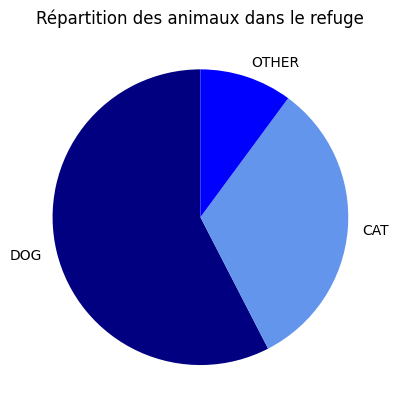

In [319]:

sizes=covid_df["Type"].value_counts(normalize=True)*100
labels=sizes.index.tolist()

# Création du pie chart
fig1, ax1 = plt.subplots()
colors = [ "navy", "cornflowerblue", "blue"]
ax1.pie(sizes, labels=labels, startangle=90,colors=colors)


# Ajout d'un titre
ax1.set_title("Répartition des animaux dans le refuge")


Text(0.5, 1.0, 'Répartition des animaux dans le refuge')

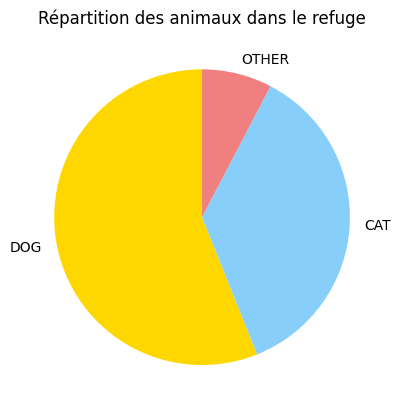

In [320]:

sizes=non_covid_df["Type"].value_counts(normalize=True)*100
labels=sizes.index.tolist()

colors = [ "gold", "lightskyblue", "lightcoral"]


# Création du pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90,colors=colors)

# Ajout d'un titre
ax1.set_title("Répartition des animaux dans le refuge")

On remarque rien ptn

In [321]:
covid_df["Type"].value_counts(normalize=True)

DOG      0.575691
CAT      0.323178
OTHER    0.101131
Name: Type, dtype: float64

In [322]:
non_covid_df["Type"].value_counts(normalize=True)

DOG      0.560699
CAT      0.362698
OTHER    0.076602
Name: Type, dtype: float64

We thought of splitting the covid crisis into different periods but we would not have enough data to analyse. We do not have categorical variables to analyse so it is complicated to do other plots than bars. 

In [323]:
covid_df['Adopted'] = (covid_df['Outcome Type'] == 'ADOPTION').astype(int)
non_covid_df['Adopted'] = (non_covid_df['Outcome Type'] == 'ADOPTION').astype(int)
covid_df['Abandoned']=((covid_df['Intake Type'] == 'STRAY') & (covid_df['Outcome Type'] != "RETURN TO OWNER")).astype(int)
non_covid_df['Abandoned']=((non_covid_df['Intake Type'] == 'STRAY')& (non_covid_df['Outcome Type'] != "RETURN TO OWNER")).astype(int)

<ipython-input-323-c84e21738ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['Adopted'] = (covid_df['Outcome Type'] == 'ADOPTION').astype(int)
<ipython-input-323-c84e21738ce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_covid_df['Adopted'] = (non_covid_df['Outcome Type'] == 'ADOPTION').astype(int)
<ipython-input-323-c84e21738ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

On commence à regarder les adoptions. 

In [324]:
covid_df["Adopted"].mean()

0.17430904522613067

In [325]:
non_covid_df["Adopted"].mean()

0.32912813385363765

<Axes: xlabel='Type'>

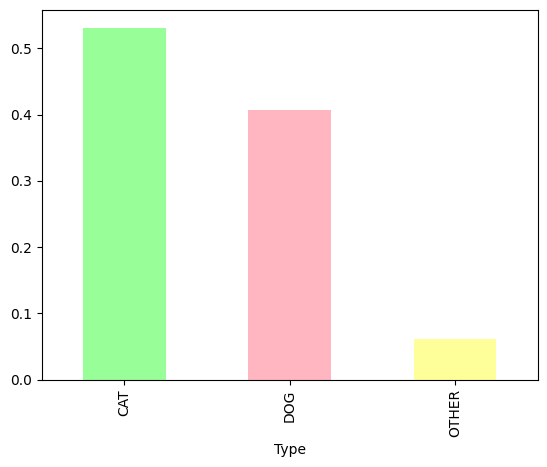

In [326]:
colors = [  '#98FF98', '#FFB6C1', '#FFFF99']
(covid_df.groupby('Type')['Adopted'].sum()/covid_df["Adopted"].sum()).plot.bar(color=colors)

<Axes: xlabel='Type'>

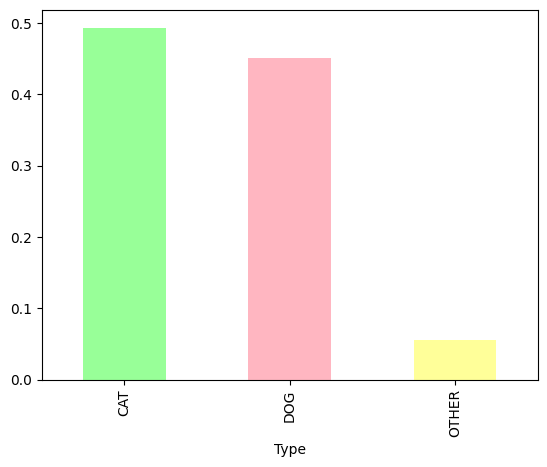

In [327]:
colors = [  '#98FF98', '#FFB6C1', '#FFFF99']
(non_covid_df.groupby('Type')['Adopted'].sum()/non_covid_df["Adopted"].sum()).plot.bar(color=colors)

Effectivement, les chats sont un peu plus adoptés pendant le covid, et les chiens sont moins adoptés.

On regarde ensuite les "abandons"

In [328]:
covid_df["Abandoned"].mean()

0.4202261306532663

In [329]:
non_covid_df["Abandoned"].mean()

0.4630352274549634

<Axes: xlabel='Type'>

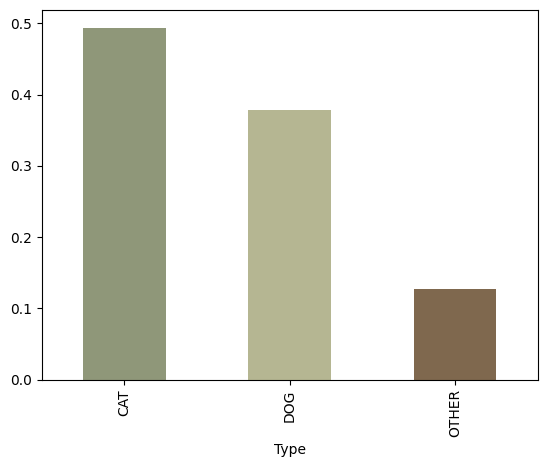

In [330]:

colors = ['#8F9779', '#B5B692', '#7F684E']
(covid_df.groupby('Type')['Abandoned'].sum()/covid_df["Abandoned"].sum()).plot.bar(color=colors)

<Axes: xlabel='Type'>

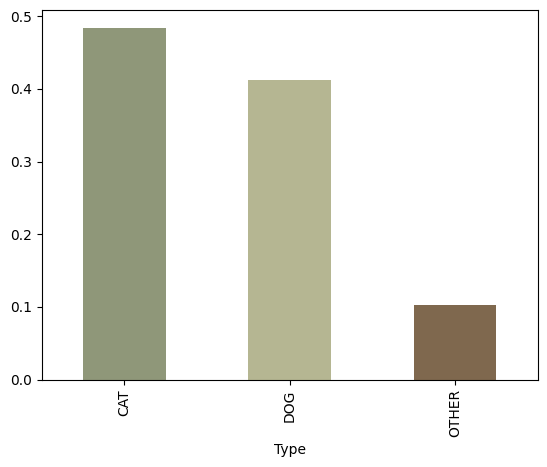

In [331]:

colors = ['#8F9779', '#B5B692', '#7F684E']
(non_covid_df.groupby('Type')['Abandoned'].sum()/non_covid_df["Abandoned"].sum()).plot.bar(color=colors)

Les chiens sont bcp plus abandonées pdnt le covid. Les chats sont bcp moins abandonnés pdnt le covid. Attention !!!!!! STRAY=errant pas abandonnés. PS: si on enlève ceux dont le outcome type est return to owner veut juste dire qu'ils étaient perdus. 

Effectivement, après rectification de ce point il semblerait que les chiens soient même moins abandonnées pdnt le covid, il faut arrêter de se perdre !!

In [332]:
covid_df["Die"]=((covid_df['Outcome Type'] == 'EUTHANIZE') | (covid_df['Outcome Type'] == 'DIED')|(covid_df['Outcome Type'] == 'DISPOSAL')|(covid_df['Outcome Condition'] == 'DEAD'))
non_covid_df["Die"]=((non_covid_df['Outcome Type'] == 'EUTHANIZE') | (non_covid_df['Outcome Type'] == 'DIED')|(non_covid_df['Outcome Type'] == 'DISPOSAL')|(non_covid_df['Outcome Condition'] == 'DEAD'))

<ipython-input-332-f59a8cfef7d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["Die"]=((covid_df['Outcome Type'] == 'EUTHANIZE') | (covid_df['Outcome Type'] == 'DIED')|(covid_df['Outcome Type'] == 'DISPOSAL')|(covid_df['Outcome Condition'] == 'DEAD'))
<ipython-input-332-f59a8cfef7d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_covid_df["Die"]=((non_covid_df['Outcome Type'] == 'EUTHANIZE') | (non_covid_df['Outcome Type'] == 'DIED')|(non_covid_df['Outcome Type'] == 'DISPOSAL')|(non_covid_

Maintenant on s'intéresse aux décès. 

In [333]:
covid_df["Die"].mean()

0.14604271356783918

In [334]:
non_covid_df["Die"].mean()

0.15646549420003208

<Axes: xlabel='Type'>

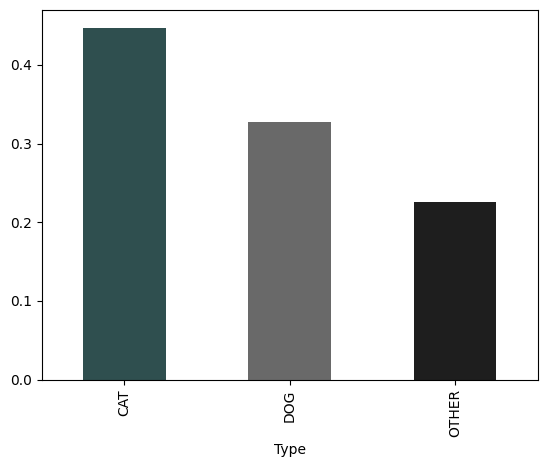

In [335]:
cvdf=covid_df
colors = ['#2F4F4F', '#696969', '#1E1E1E']
(cvdf.groupby('Type')['Die'].sum()/cvdf["Die"].sum()).plot.bar(color=colors)

<Axes: xlabel='Type'>

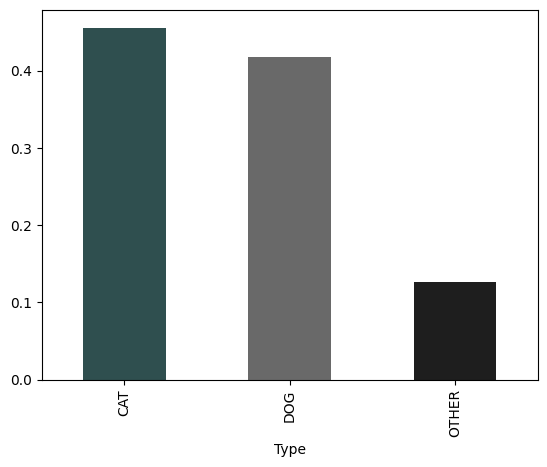

In [336]:
colors = ['#2F4F4F', '#696969', '#1E1E1E']
(non_covid_df.groupby('Type')['Die'].sum()/non_covid_df["Die"].sum()).plot.bar(color=colors)

Apparement moins de chiens sont morts pendant le covid, mais + de other.

<ipython-input-337-9921f0c98811>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("rainbow", len(test))


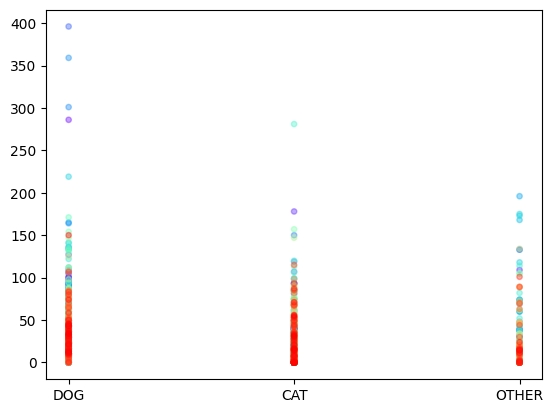

In [337]:
fig, ax = plt.subplots()
test=covid_df[(covid_df['Outcome Type'] != "RETURN TO OWNER")]
colors = plt.cm.get_cmap("rainbow", len(test))
ax.scatter(test["Type"], test["Days in Shelter"], alpha=0.4,s=15,c=range(len(test)), cmap=colors)

<ipython-input-338-38f65fe4feb8>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("rainbow", len(test))


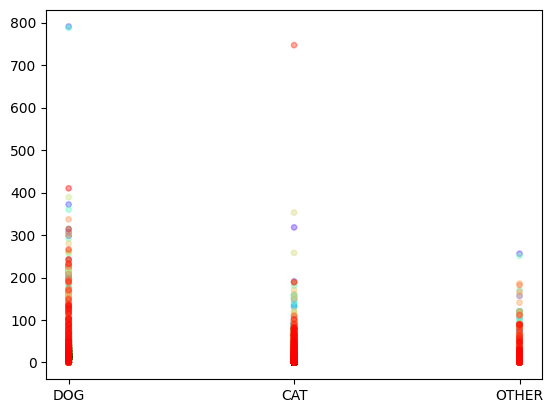

In [338]:
fig, ax = plt.subplots()
test=non_covid_df[(non_covid_df['Outcome Type'] != "RETURN TO OWNER")]
colors = plt.cm.get_cmap("rainbow", len(test))
ax.scatter(test["Type"], test["Days in Shelter"], alpha=0.4,s=15,c=range(len(test)), cmap=colors)

Eve tu es bête prck bien sûr que c'est + court étant donné qu'on regarde les animaux qui sont rentrésau début du covid min et sortis à la fin max. 

In [339]:
covid_df["Count"].value_counts()

1    3135
0      49
Name: Count, dtype: int64

In [340]:
df["Count"].value_counts()

1    22055
0       53
Name: Count, dtype: int64

Cette donnée est très étrange. 